# Student ID: 020693

# 1. 
Analyze a Network

In [1]:
# Importing all the necessary libraries to work with the coursework
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import collections
import powerlaw
import re
import matplotlib.colors as mcolors
from collections import Counter, defaultdict
import operator
import seaborn as sns
from matplotlib import pyplot, patches
import matplotlib
from scipy.stats import lognorm, kstest
import community
import random
rcParams['figure.figsize'] = 17, 10

# (1.a) 
Load the Network.

In [2]:
Gx = nx.read_edgelist("ia-enron.edges.txt",nodetype=int)

# (1.b) 
Plot the Network Adjacency Matrix.

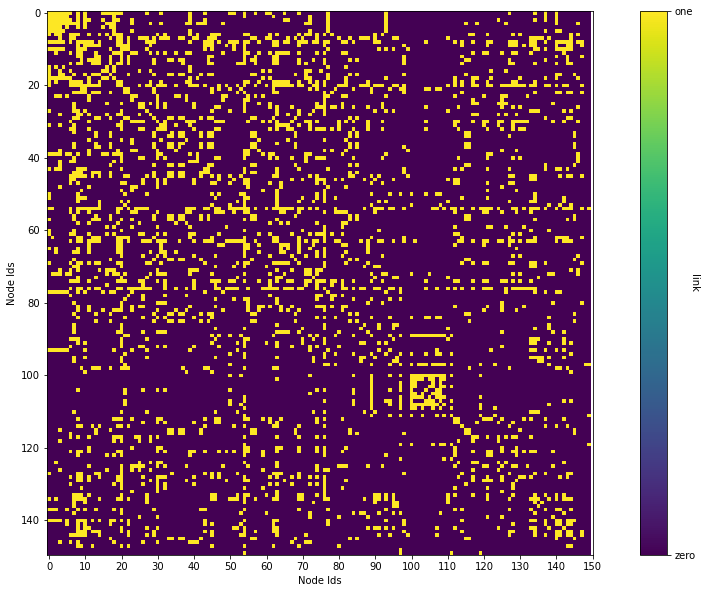

In [3]:
def plotAdjMat(G):                                 # Define the function to plot the adjacency matrix
    plt.imshow(nx.to_numpy_matrix(G))              # Convert the the graph into numpy matrix in order to plot
    cbar = plt.colorbar()
    cbar.set_ticks([0,1])
    cbar.ax.set_yticklabels(['zero', 'one'])
    cbar.set_label('link', rotation=270)
    plt.xlabel('Node Ids')
    plt.ylabel('Node Ids')
    plt.xticks(range(0,len(G.nodes)+10, 10))

# Call the function to plot the adjacency matrix
plotAdjMat(Gx)

# (1.c) 
Plot the Degree distribution.

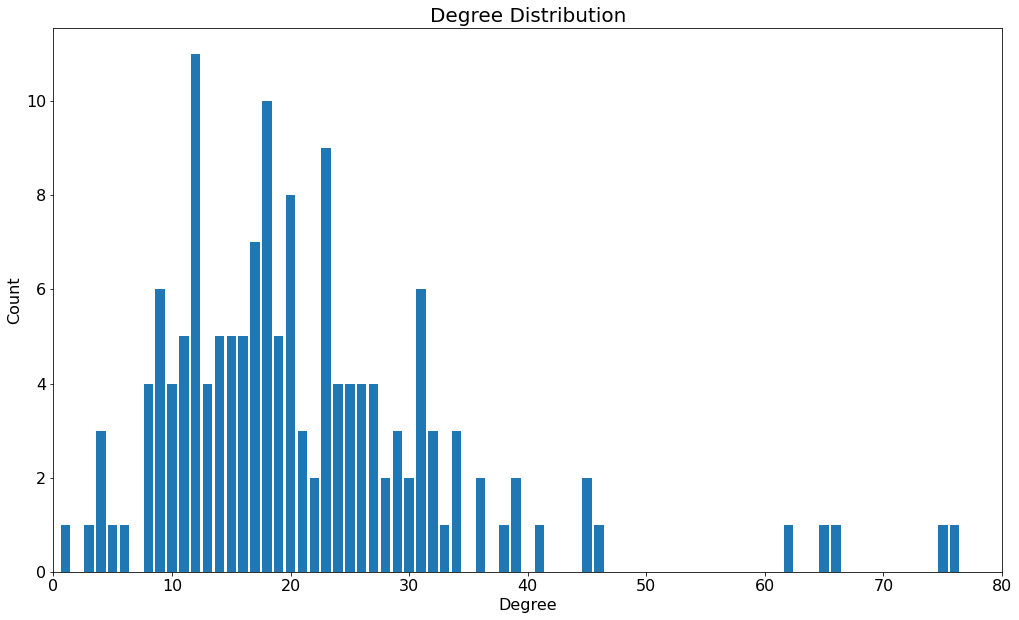

In [4]:
def plot_degreedist(G):
    # Get the degree of all the nodes in a sorted order
    degree_sequence = sorted([degree for node, degree in G.degree])
    # Count the the number of nodes with the same degree against the degree of the node
    degreeCount = collections.Counter(degree_sequence)
    # Get the degree and count of degrees into 2 variables to plot
    d, c = zip(*degreeCount.items())
    fix, ax = plt.subplots()
    # Plot the degree against the count
    plt.bar(d,c, width=0.80)
    plt.title("Degree Distribution", size=20)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlim([0,80])
    plt.ylabel("Count", size=16)
    plt.xlabel("Degree", size=16)
    plt.show()

# Call the function to plot the Degree Distribution
plot_degreedist(Gx)

# (1.d) 
Test the hypothesis that degree distribution has a lognormal shape.
Using the Kolomoropv-Smirnov test can we accept or reject this hypothesis?

In [5]:
deg = list(dict(Gx.degree()).values()) 
sigma, loc, scale = lognorm.fit(deg, floc=0) 
mu = np.log(scale) 
print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma) 
stat, p = kstest(deg, 'lognorm', args=(sigma, 0, scale))
print("p value is: ", p)

mu    =   2.90258
sigma =   0.60948
p value is:  0.2594639103468688


Answer:

Null Hypothesis(Ho): The degree distribution of Gx has a lognormal shape

p-value: The probability of findinding the degree distribution of Gx having a a lognormal shape

As we see in the above result, that the p value is 0.2594639103468688 which is much higher than the standard scale of 0.05 which means it is more likely to have the shape of the degree distribution as lognormal shape.  Hence we can conclude that the Null Hypothesis can not be rejected. So, we can say the degree distribution has a lognormal shape.

# (1.e) 

Is the Network you are analyzing Assortative or Disassortative?

Please explain your answer. (Using a plot or mathematical evaluation).

In [6]:
r = nx.degree_assortativity_coefficient(Gx)
print(r)

-0.04538787508087504


Text(0, 0.5, 'Node Degrees')

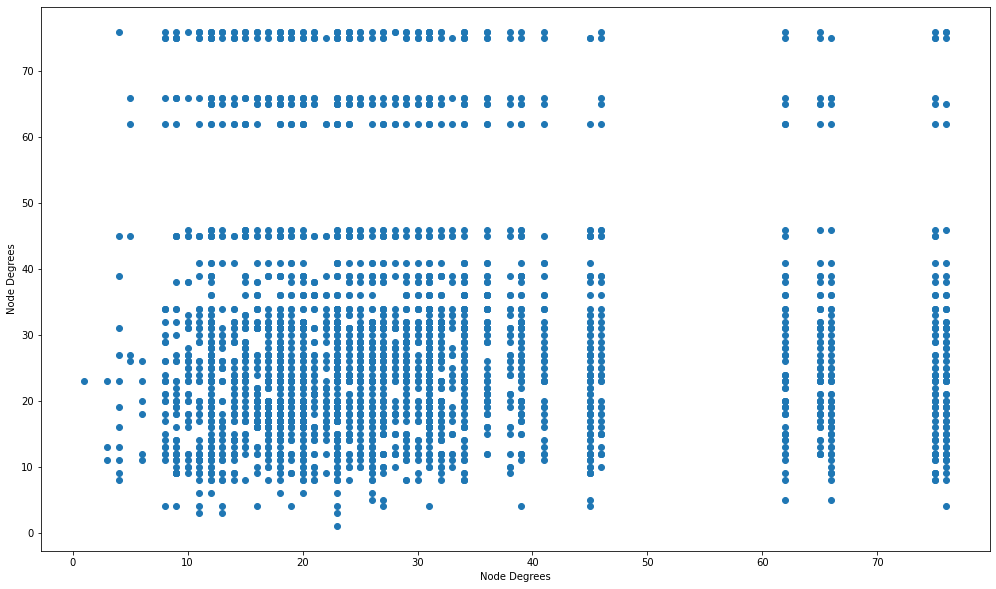

In [7]:
xdata = []
ydata = []
for a,b in Gx.edges:
  xdata.append(Gx.degree(a))
  ydata.append(Gx.degree(b))
  xdata.append(Gx.degree(b))
  ydata.append(Gx.degree(a))
plt.scatter(xdata,ydata)
plt.xlabel("Node Degrees")
plt.ylabel("Node Degrees")

Answer: 

As we see above we find the below 2 observations:

1. At first we see, that the degree assortativity coefficient is negative which means there are more nodes with higher degrees which are connected with nodes of lower degress and vice versa compared to the connections between same degree of nodes, which points us towards the network being a disassortitative.

2. Secondly, in the plot we see that the points are not concentrated towards lower and higher degrees, instead it spreads across the whole plot, which visually shows us that are more lower degree nodes which are connected with nodes of higher degrees compared to the number of nodes which are connected to the similar degree nodes.

# (1.f) Fitting.

Plot the PDF and CCDF of the degree distribution as a power law, using the powerlaw package we saw during
the lecture and the lab session of ECMM447.

In [8]:
def Plot_pdf_CCDF(Data, xlabel, ylabel):    
    fit = powerlaw.Fit(Data)                    #Fit the data
    fig2=fit.plot_pdf(color='b', linewidth=2)   #<-- Plot the PDF of the original data

    fit.power_law.plot_pdf(color='b', linestyle='dashed', ax=fig2)   #<-- Plot the PDF of the power law fit

    fit.plot_ccdf(color='r', linewidth=2, ax=fig2)    #<-- Plot the PDF of the original data in the same fig

    fit.power_law.plot_ccdf(color='r', linestyle='dashed', ax=fig2)   #<-- Plot the PDF of the power law fit

    plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')
    plt.xlabel(xlabel, fontsize = 'x-large')
    plt.ylabel(ylabel, fontsize = 'x-large')
    plt.show()

Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


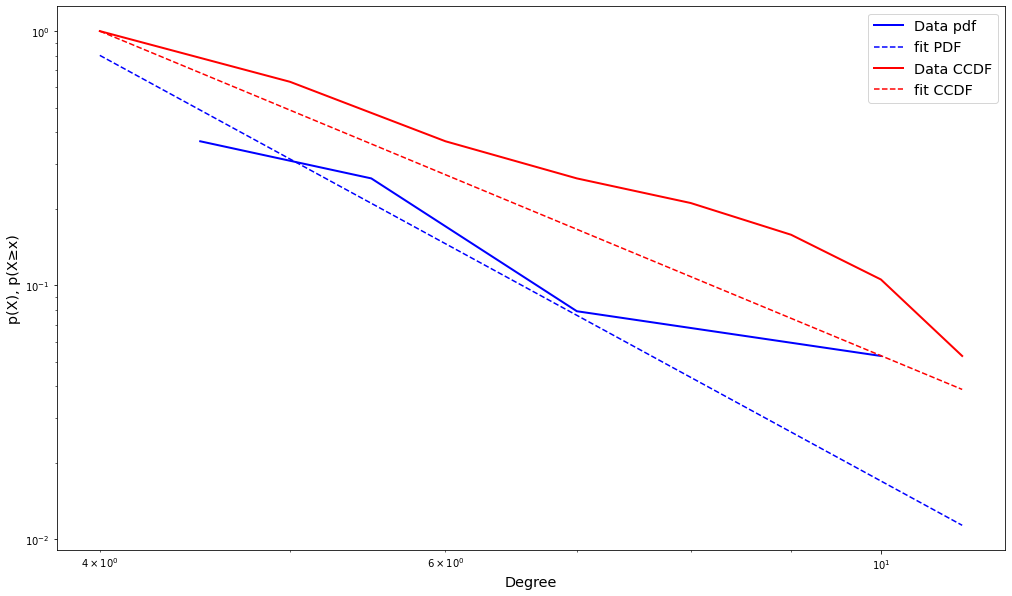

In [9]:
degree_sequence = sorted([degree for node, degree in Gx.degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
Plot_pdf_CCDF(list(degreeCount.values()), 'Degree', 'p(X), p(X≥x)')

# 2. Centrality and Community Detection

# (2.a) Centralities.

Explain the degree centrality, and the eigenvector centrality. What are the differences between the two? Provide
one practical example for the degree centrality and one for the eigenvector centrality. When is useful to apply
each of two metrics. Explain your answers.

Answer:

   The degree centrality for a node simply its degree. Degree of a node is the number of edges that it has. The basic intuition is that nodes with more connections are more influential and important in a network. A node with 10 social connections would have a degree centrality of 10. A node with 1 edge would have a degree centrality of 1. Sometimes, a social network program will convert those numbers into a 0-1 scale. In such cases, the node with the highest degree in the network will have a degree centrality of 1, and every other node's centrality will be the fraction of its degree compared with that most popular node. Degree Centrality helps us to determine which node is the most central in terms of its degree or influence, In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.
    
   The Eigenvector centrality measures the importance of a node based on the importance of its neighbours. Eigenvector centrality allows for connections to have a variable value, so that connecting to some vertices has more benefit than connecting to others. The PageRank algorithm used by Google's search engine is a variant of Eigenvector Centrality, primarily used for directed networks. PageRank considers (1) the number of in-bound links (i.e., sites that link to your site), (2) the quality of the linkers (i.e., the PageRank of sites that link to your site), and (3) the link propensity of the linkers (i.e., the number of sites the linkers link to). 
    
   The degree centrality helps to find the most connected node or person whereas Eigenvector centrality helps to find the most influential node or the node which is connected to the greatest number of highly connected nodes.

# (2.b.i) Closeness Centrality.

Create the function centrality_closeness(), that inputs the network and returns the closeness centrality of
each node. (Do not use the function closeness_centrality built in networkx or other python packages, you
have to code it by yourself.)

In [10]:
# The function to plot the centrality
def plot_centrality(G, measures, measure_name, size_rep):   
    '''This function draw a network based on a specific metric in the color and a specified layout

    Attributes:
    G: The networkx object
    pos: x and y coordinates of each node
    measures: dict with the node id as key and measure of centrality as value
    measure_name: string variable with the name of the plotted network '''

    pos = nx.spring_layout(Gx)
    nodes = nx.draw_networkx_nodes(Gx, pos, node_size=[n * size_rep for n in measures.values()], 
                                   cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys())) #<-- Set the node attributes to be plotted,
                                                                   # with the network, the nodes position, 
                                                                   # the color map for the measure that comes 
                                                                   # in numbers ranging in the color map

    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Setting the color map of the nodes in a 
                                                                   #symmetric logaritmic normalized scale

    labels = nx.draw_networkx_labels(Gx, pos, font_color='white') #<-- Set the node labels
    edges = nx.draw_networkx_edges(Gx, pos) #<-- Set the edges pisitions
    plt.title(measure_name) #<-- Set the title of the plot
    cbar = plt.colorbar(nodes) #--> set the range of the color bar
    cbar.set_label('Weight', rotation=270) #--> Set the label of the color bar and rotate it
    plt.axis('off') #<-- Remove the axis of the network plot
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


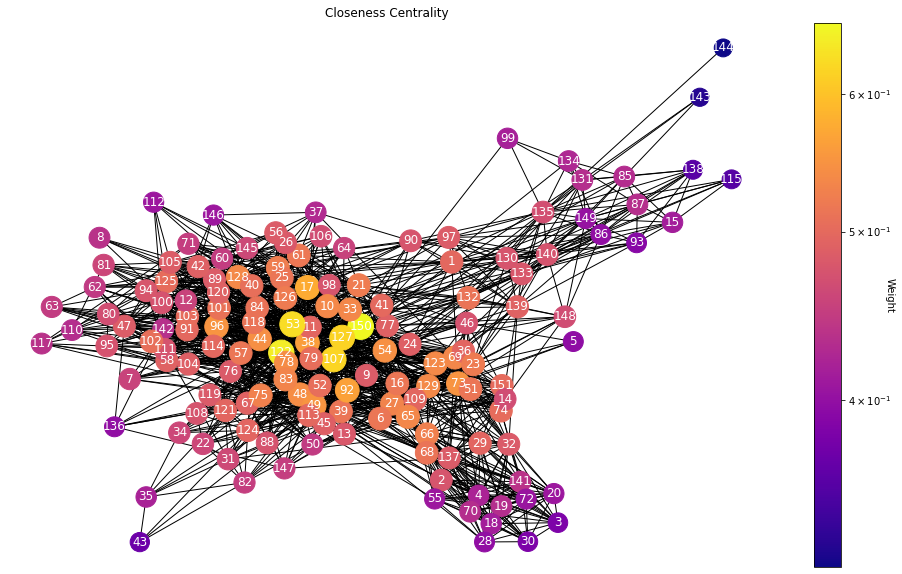

In [11]:
def centrality_closeness(G):    
    path = nx.single_source_shortest_path_length   
    nodes = G.nodes()     
    centrality = {}    
    for n in nodes: 
        sp = path(G,n) 
        totsp = sum(sp.values()) 
        if totsp > 0.0 and len(G) > 1: 
            centrality[n] = (len(sp)-1.0) / totsp 
            # normalize to number of nodes-1 in connected part 
            s = (len(sp)-1.0) / ( len(G) - 1 ) 
            centrality[n] *= s 
        else: 
            centrality[n] = 0.0            
    return centrality 

d = centrality_closeness(Gx)
plot_centrality(Gx, d, measure_name='Closeness Centrality', size_rep=1000)

# (2.b.ii) Comparison Centralities.

Using the network Gx, compare the result of your metrics centrality_closeness() with the eigenvector
centrality, with a scatter plot on the x closeness centrality measure and y the degree centrality one. Is there
any correlation? Why?

Answer: 

As we see in the below plot and correlation matrix, there is high correlation between closeness centrality and eigenvector centrality. If we think from real life, personalities like "Mark Zuckerberg" or "Barack Obama" will naturally have high eigenvector centrality as they will not necessarily have a huge network of connections but they will surely have connections to well-known and well-connected personalities who in turn will have a large connections. Also, for close centrality we have a proven use case of "kevin Bacon", even today when I check the Bacon number of any small celebity of India in https://oracleofbacon.org/, it is not more than 3 mostly and these small celebrities are well-connected with many local people, so it does not take much connections to reach a celebrity who has a high eighenvector centrality. The case would not be of huge difference with any other celebrities like "Mark Zuckerberg" or "Barack Obama" or any other people who are connected with many other well-connected people. Contrastly, it will take much more efforts and connections to connect any random ordinary citizen of one country to similar citizen of another or even same country as they will have less connections and consequently they will have much less eigen vector and closeness centrality.

In [12]:
c = centrality_closeness(Gx)
Ordered_Frequency_closeness = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse = True)}

e = nx.eigenvector_centrality(Gx)
Ordered_Frequency_eigen = {k: v for k, v in sorted(e.items(), key=lambda item: item[1], reverse = True)}

In [13]:
import numpy as np
# To find the centrality matrix between Closeness and Eigenvector centralities
np.corrcoef(np.array(list(Ordered_Frequency_closeness.values())), 
            np.array(list(Ordered_Frequency_eigen.values())))

array([[1.        , 0.95303747],
       [0.95303747, 1.        ]])

Text(0, 0.5, 'Eigenvector Centrality')

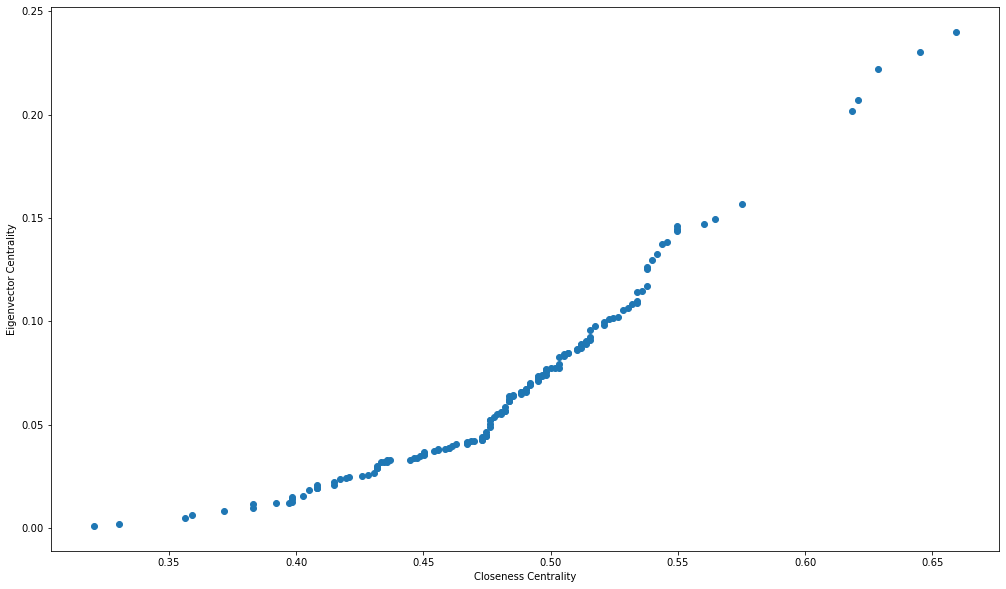

In [14]:
# Scatter plot between Closeness and Eigenvector centralities
plt.scatter(Ordered_Frequency_closeness.values(), Ordered_Frequency_eigen.values())
plt.xlabel("Closeness Centrality")
plt.ylabel("Eigenvector Centrality")

# (2.c) Centrality Measure.

Please consider now the network Gx loaded in question 1.a.. Imagine that Gx is now representing a social
network, similar to Facebook, Instagram or WeChat. You have to advertise a product and you have budget to
hire only one influencer (i.e. a node in the network Gx). Using the metrics within the centrality metrics we saw
during the lectures ECMM447 and the Labs, suggest the influencer you will hire (as Node id). Explain your
decision.

Answer: 

As per the following analysis we see node 122 has the highest Eigenvector centrality which means this node is connected to the most number of influential nodes and hiring this node would result is reaching my product to highest number of nodes or people.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


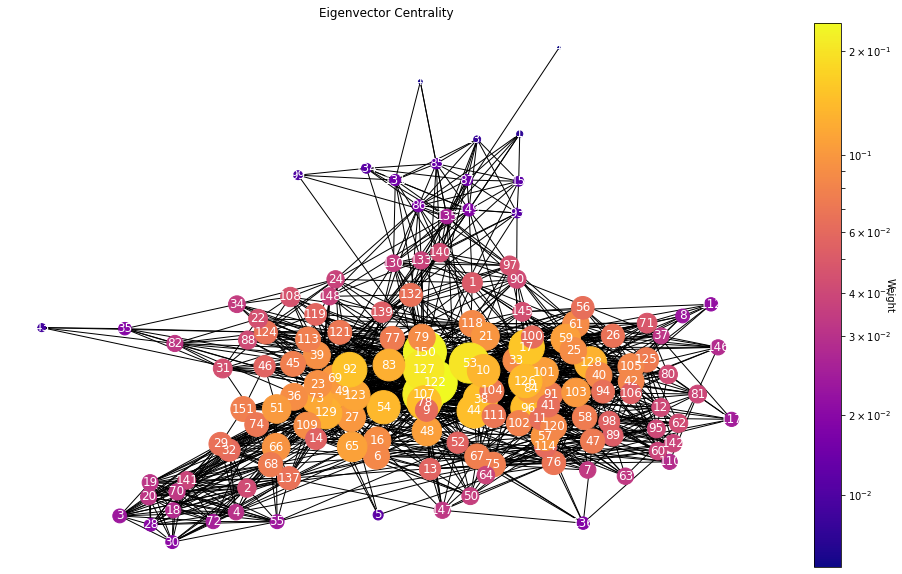

In [15]:
def plot_centrality(G, measures, measure_name):   
    '''This function draw a network based on a specific metric in the color and a specified layout

    Attributes:
    G: The networkx object
    pos: x and y coordinates of each node
    measures: dict with the node id as key and measure of centrality as value
    measure_name: string variable with the name of the plotted network '''

    pos = nx.spring_layout(Gx)
    nodes = nx.draw_networkx_nodes(Gx, pos, node_size=[n * 8000 for n in measures.values()], 
                                   cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys())) #<-- Set the node attributes to be plotted,
                                                                   # with the network, the nodes position, 
                                                                   # the color map for the measure that comes 
                                                                   # in numbers ranging in the color map

    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Setting the color map of the nodes in a 
                                                                   #symmetric logaritmic normalized scale

    labels = nx.draw_networkx_labels(Gx, pos, font_color='white') #<-- Set the node labels
    edges = nx.draw_networkx_edges(Gx, pos) #<-- Set the edges pisitions
    plt.title(measure_name) #<-- Set the title of the plot
    cbar = plt.colorbar(nodes) #--> set the range of the color bar
    cbar.set_label('Weight', rotation=270) #--> Set the label of the color bar and rotate it
    plt.axis('off') #<-- Remove the axis of the network plot
    plt.show()

# Call the function to plot the graph
plot_centrality(Gx, measures = nx.eigenvector_centrality(Gx), measure_name = 'Eigenvector Centrality')

In [16]:
d = nx.eigenvector_centrality(Gx)
Ordered_Frequency_eigen = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}
max_key = max(Ordered_Frequency_eigen, key=Ordered_Frequency_eigen.get)
all_values = Ordered_Frequency_eigen.values()
max_value = max(all_values)
print("The node {} has maximum eigenvector centrality of {}".format(max_key,max_value))

The node 122 has maximum eigenvector centrality of 0.23999231568820278


# (2.d) Influencer.

Define a function Draw_ego_network that inputs a network G (a networkx network), a network layout (as
list of nodes position), and a node id and the maximum distance of interaction (as int). The function
Draw_ego_network will output the network plot of G outlining (with a different color and bigger size) the
node selected, and the ego network of the node id coloring in different colors the links and the nodes depending
on the interaction distance.


Test your function with the network Gx, the node id of the influencer selected in the question 2.c, a network
layout of your choice (that will improve the readability of the plot) and interaction distance 2. (See the expected
output at the end.)

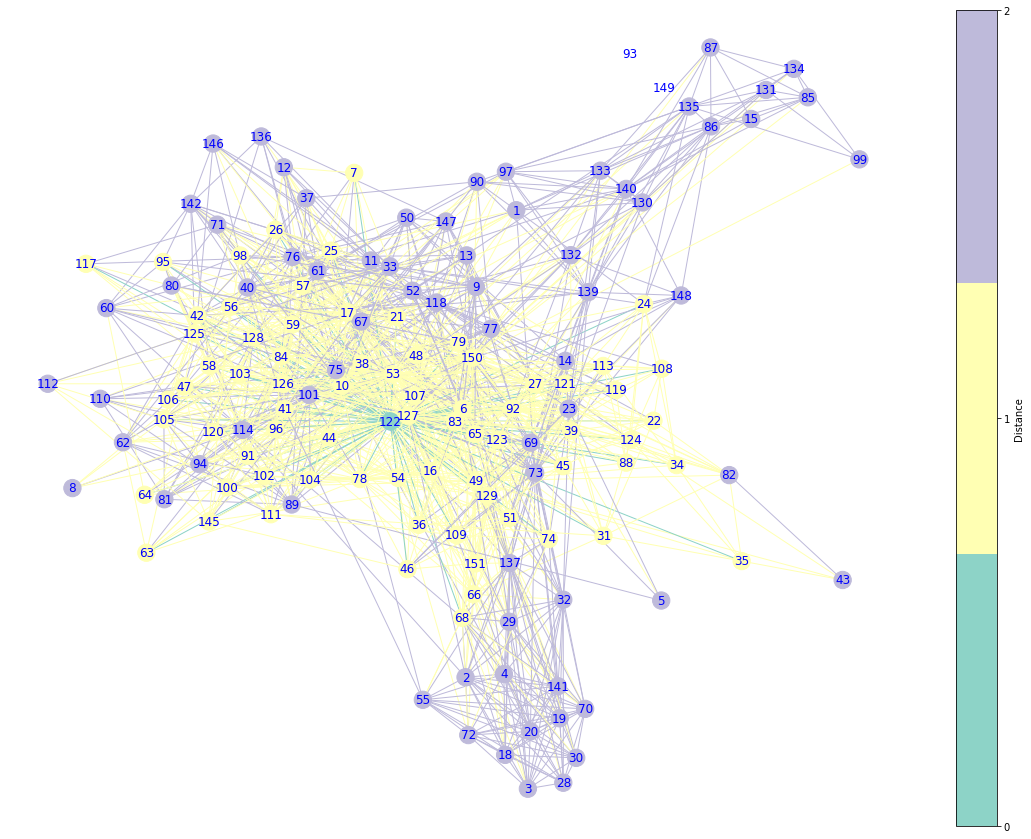

In [17]:
def Draw_ego_network(G, node_id, max_inter_dist):
    plt.figure(figsize=(20,15))
    length=dict(nx.all_pairs_shortest_path_length(G,cutoff=max_inter_dist))
    measures= length[node_id]
    clusters = np.array(list(set(measures.values())))
    pos = nx.spring_layout(G)
    nodes = nx.draw_networkx_nodes(G,pos, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), 
                                   node_color=list(measures.values()), nodelist=list(measures.keys()))
    
    for i in G.edges:
        if measures.get(i[0]) != None and measures.get(i[1]) != None: 
            nx.draw_networkx_edges(G, pos, edgelist=[i],
                                   edge_color=plt.cm.Set3(clusters)[measures.get(i[0])])
            
    cb = plt.colorbar(nodes,ticks=clusters,label='Distance')
    nx.draw_networkx_labels(G,pos,font_color='b')
    plt.axis('off')
    plt.show()

# Call the function to plot the ego graph
Draw_ego_network(Gx,122,2)

# (2.e) Community Detection and Centrality.

Decide and declare a community algorithm of your choice among the ones we saw during the lectures. Plot
the network with its communities. Plot the adjacency matrix of the network rearranged in order to outline the
communities.

<Figure size 2160x2160 with 0 Axes>

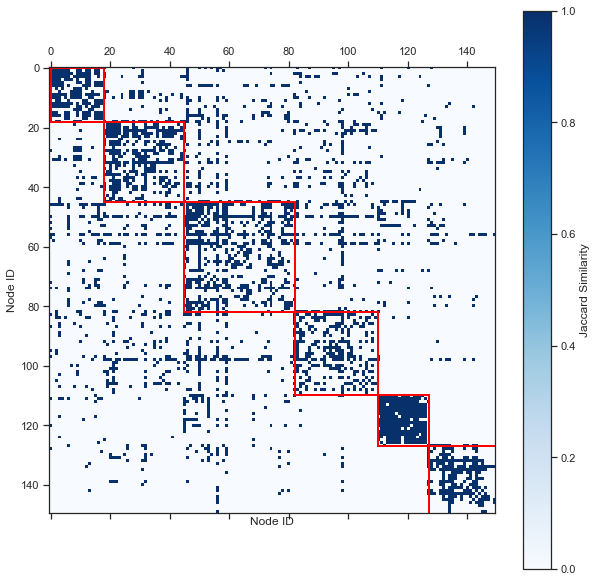

In [18]:
def com_detect(G, part):
    
    order_vector = []
    for ke, va in (Counter(part.values())).items():
        order_vector.append([ke, va])

    order_vector = sorted(order_vector, key=operator.itemgetter(1), reverse=True)
    new_ord = [ke[0] for ke in order_vector]
    part2 = {}

    for ke, va in part.items():
        part2[ke] = new_ord.index(va)

    louvain_comms = defaultdict(list)

    for node_index, comm_id in part2.items():
        louvain_comms[comm_id].append(node_index)

    louvain_comms = louvain_comms.values()

    nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]

    adjacency_matrix = nx.to_numpy_matrix(G, nodelist=nodes_louvain_ordered)
    sns.set(style="ticks")

    fig = plt.figure(figsize=(30,30))
    plt.matshow(adjacency_matrix, cmap=plt.cm.Blues, interpolation='none')

    partitions = [louvain_comms]
    colors = ['red']

    assert len(partitions) == len(colors)

    ax = plt.gca()

    for partition, color in zip(partitions, colors):
        current_idx=0
        for module in partition:
            ax.add_patch(matplotlib.patches.Rectangle((current_idx, current_idx),
                        len(module), len(module), facecolor='none', edgecolor=color, linewidth="2"))

            current_idx += len(module)

    plt.colorbar(label="Jaccard Similarity")
    plt.xlabel("Node ID")
    plt.ylabel("Node ID")  
    

# Call the function to plot the adjacency matrix
com_detect(Gx, community.best_partition(Gx))

# (2.f) Find and plot the longest Shortest Path.

Create a function plot_long_shortest() that takes as input Gx. The function plot_long_shortest()
returns the plot of Gx with outlined the longest shortest path present inside the network, print the length of
path as list of number of nodes included in the shortest path). Find the longest shortest paths inside the network
Gx, using your function plot_long_shortest() print the source node the target node and the ids of the nodes
within the longest shortest path.

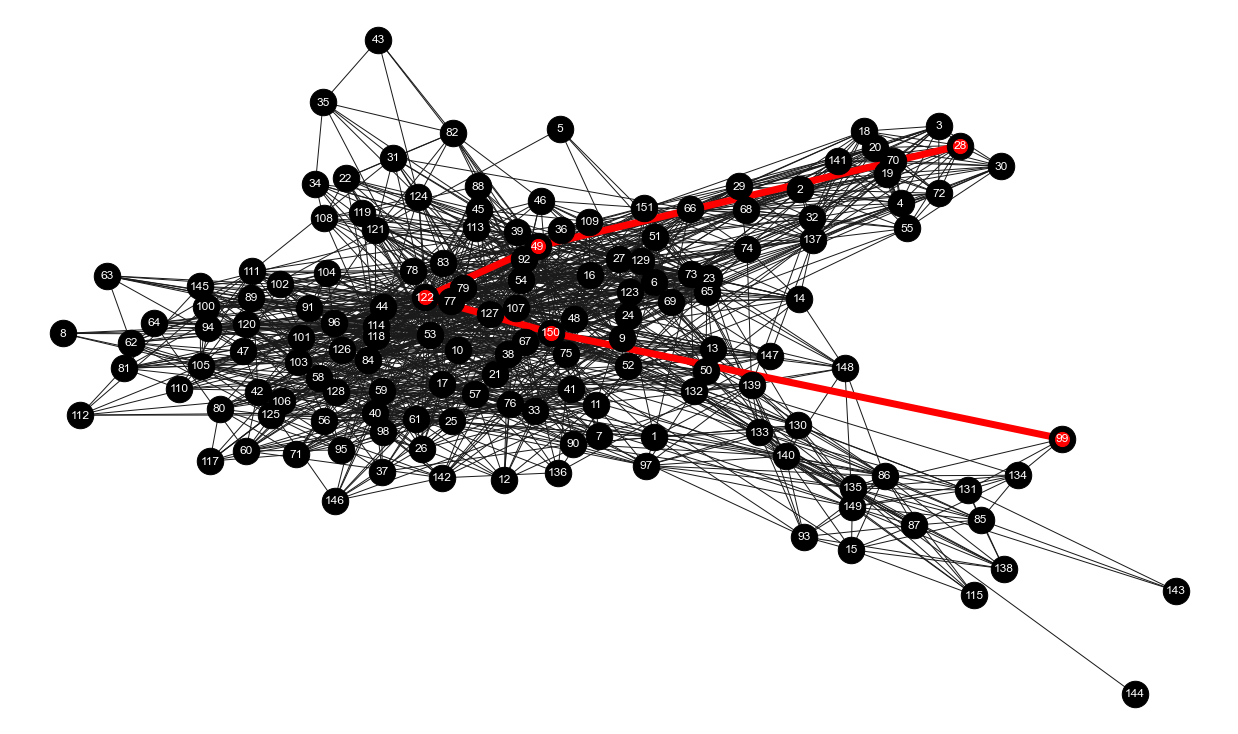

In [26]:
def plot_long_shortest(G):
    pos = nx.spring_layout(Gx)
    nx.draw(Gx, pos, with_labels=True, node_size=700, node_color= 'black', font_color='white')

    last_path = []
    for i in Gx.nodes:
        for j in Gx.nodes:
            path = nx.shortest_path(Gx,source=i,target=j)
            if len(last_path) <= len(path):
                last_path = path
    edge = [(last_path[i], last_path[i+1]) for i in range(len(last_path)-1)]  
    nx.draw_networkx_nodes(Gx, pos, nodelist=last_path, node_color='red', node_size=200)
    nx.draw_networkx_edges(Gx, pos, edgelist=edge, edge_color='red', width=7)
    plt.show()

# Call the function to plot the edges between longest shortest nodes
plot_long_shortest(G = nx.watts_strogatz_graph(1000,20, p = 0.01))

# 3. SI Model

In this section you have to create your functions and you cannot use any pre-written code or python libraries
that perform SI/SIR/SIS simulation. If you will use python libraries that implement SI/SIR models or similar
you will get zero points.
(Note: sampling matters. To run 100 simulations a pc should not take more than 3 minutes. Please select a
correct amount of simulations to validate your analysis.)

# (3.a) SI Model.

Define the function SI_model() that inputs:

• G (Network as networkx)

• initial_infecteds (as list of nodes ID)

• beta (trasmission probability as float)

• t_simulation (simulation iteration time as int)

Output: A dictionary that contains the nodes status at each time steps. In this case the status can be:

• ’S’ as susceptible.

• ’I’ as Infected.

Using the network Gx and beta=0.01, t_simulation=300, initial_infecteds=(list of 3 random nodes)
plot the number of user in each status at each time step of the simulation.

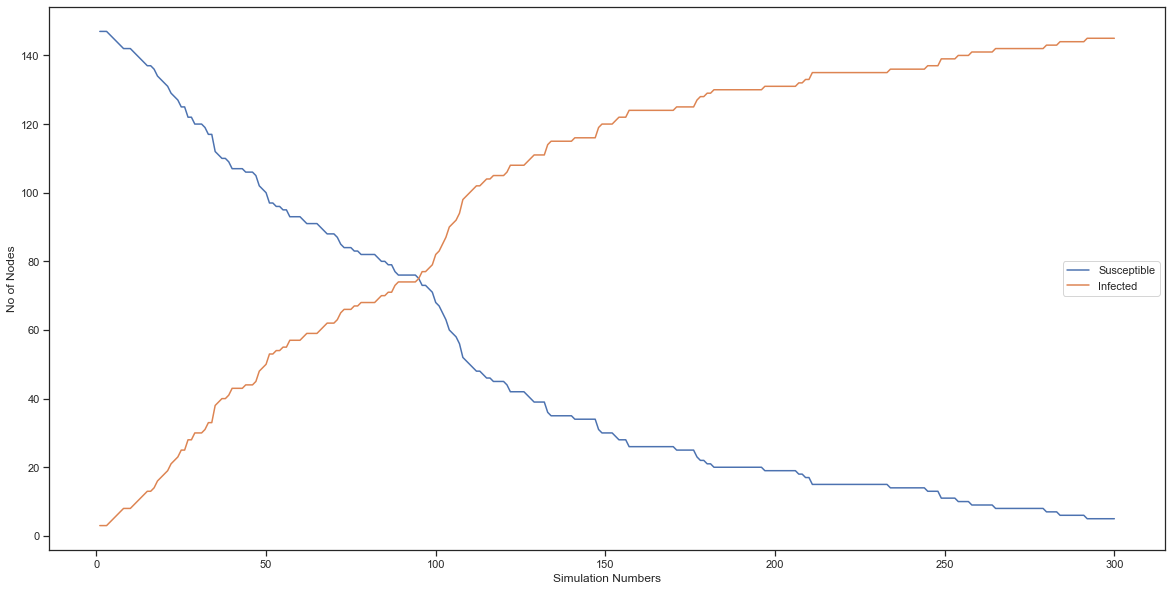

In [20]:
def SI_model(G, initial_infecteds, beta, t_simulation):
    
    infected = initial_infecteds.copy()
    neighbor_of_infected = []
    susceptible = [k for k in G.nodes if k not in infected]
    simulation = 1
    N = len(G.nodes)
    final_result = {}

    while simulation <= t_simulation:  
        #storing the result
        final_result[simulation] = {'S':susceptible.copy(), 'I':infected.copy()}
        
        # get susceptable neighbour nodes of infected nodes and infect the succescptable neighbour nodes 
        infected, susceptible = infectNodes(infected, susceptible, 
                                            getSusceptibleNeighborNodes(G, infected), beta)
        simulation += 1    
    return final_result

def getSusceptibleNeighborNodes(G,infected,R=[]):
    neighbor_of_infected = set()
    for node in infected:
        for i in nx.all_neighbors(G,node):
            if i not in infected and i not in R:
                neighbor_of_infected.add(i)    
    return neighbor_of_infected


def infectNodes(infected,susceptible,neighbor_of_infected,beta):    
    for i in neighbor_of_infected:
        infected_node = np.random.choice([True,False],p=[beta,1-beta])        
        if infected_node:
            if i not in infected:
                infected.append(i)
            if i in susceptible:
                susceptible.remove(i)                
    return infected, susceptible

final_result_SI = SI_model(Gx, initial_infecteds = [3, 7, 9], beta=0.01, t_simulation=300 )
        
plt.figure(figsize=(20,10))
plt.plot(final_result_SI.keys(), [len(final_result_SI[a]['S']) for a in final_result_SI.keys()], 
         label='Susceptible')
plt.plot(final_result_SI.keys(), [len(final_result_SI[a]['I']) for a in final_result_SI.keys()], 
         label='Infected')
plt.xlabel("Simulation Numbers")
plt.ylabel("No of Nodes")
plt.legend()

# (3.b) SIR Model.

It has been discovered that infected nodes become immune after a given recovery time. If a node is immune
and it is in contact with the infected node it does not became infected, and it will not spread the infection!

Define the function SIR_model() that inputs:

• G (a Network as networkx)

• initial_infected (nodes that are infected at time=0 as list of nodes ID)

• beta (trasmission probability as float)

• t_simulation (simulation iteration time as int)

• recovery_time (nodes that are vaccinated as list of nodes ID)

• the number of days needed for the recovery.

Output: a dictionary that contains the nodes status at each time steps. In this case the status can be:

• ’S’ as susceptible.

• ’I’ as Infected.

• ’R’ as Recovered.

Using the network Gx and beta=0.005, t_simulation=300, initial_infected=(list of 3 random nodes),
recovery_time=15, plot the number of users in each status at each simulation time step.

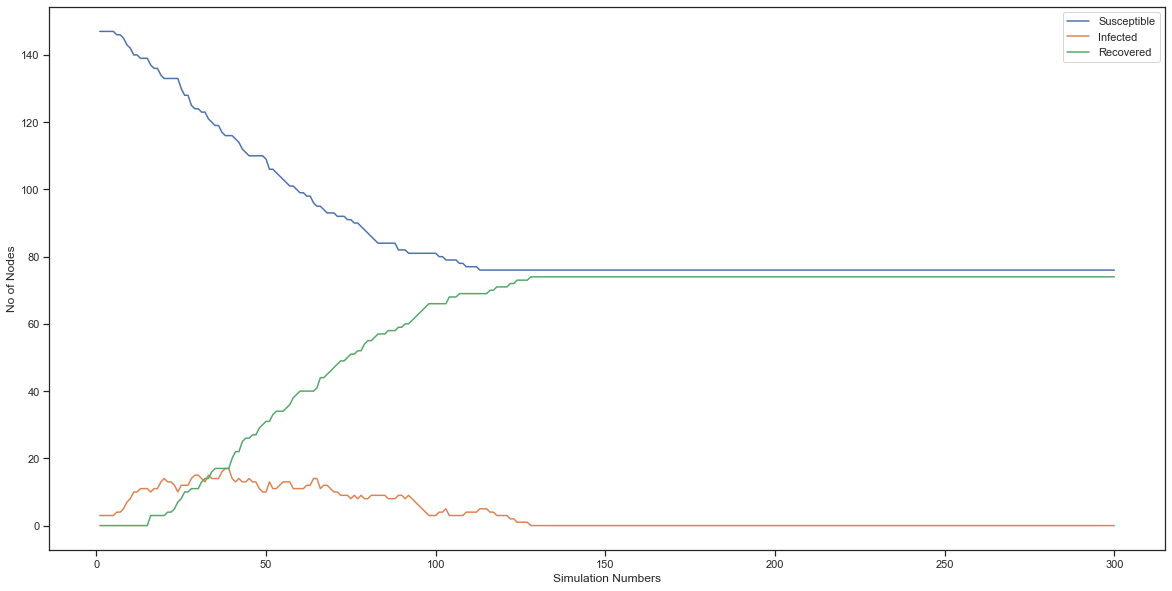

In [21]:
def SIR_model(G, initial_infecteds, beta, t_simulation, recoveryTime):
    infected = initial_infecteds.copy()
    recovered = []
    susceptible = [k for k in G.nodes if k not in infected]
    simulation = 1
    final_result = {}

    while simulation <= t_simulation:  
        #storing the result
        final_result[simulation] = {'S':susceptible.copy(), 'I':infected.copy(), 'R':recovered.copy()}
        
        # get susceptable neighbour nodes of infected nodes and infect the succescptable neighbour nodes 
        infected, susceptible = infectNodes(infected, susceptible, getSusceptibleNeighborNodes(G, infected, recovered), beta)
        
        # Recovery Logic
        if simulation >= recoveryTime:
            n = simulation - recoveryTime + 1
            for item in final_result[n]['I']:
                if item in infected:
                    infected.remove(item)
                if item not in recovered:
                    recovered.append(item)        
            
        simulation += 1    
    return final_result

final_result_SIR = SIR_model(Gx, initial_infecteds = [3, 7, 9], beta=0.01, t_simulation=300, recoveryTime=15)

plt.figure(figsize=(20,10))
plt.plot(final_result_SIR.keys(), [len(final_result_SIR[a]['S']) for a in final_result_SIR.keys()], 
         label='Susceptible')
plt.plot(final_result_SIR.keys(), [len(final_result_SIR[a]['I']) for a in final_result_SIR.keys()], 
         label='Infected')
plt.plot(final_result_SIR.keys(), [len(final_result_SIR[a]['R']) for a in final_result_SIR.keys()], 
         label='Recovered')
plt.xlabel("Simulation Numbers")
plt.ylabel("No of Nodes")
plt.legend()

# (3.c) Second Wave.

After 100 days a second wave of the same infection start to spread on your network. Starting from day
100: 30 people get infected randomly in your network. Keep fixed the simulation propose by the SIR Model in
question 3.b. At day 100, randomly add 30 new infections. If a person is infected by the second wave this set
of rules applied:

• if the person was ’S’ it became infected.

• if the person was ’I’ you need to set to zero the recovery time (it will have to wait 15 days to became
immune).

• ’R’ remain recovered and it is immune to the second wave.
This new infection transmits more easily and it has a beta=0.02!

<Figure size 1800x720 with 0 Axes>

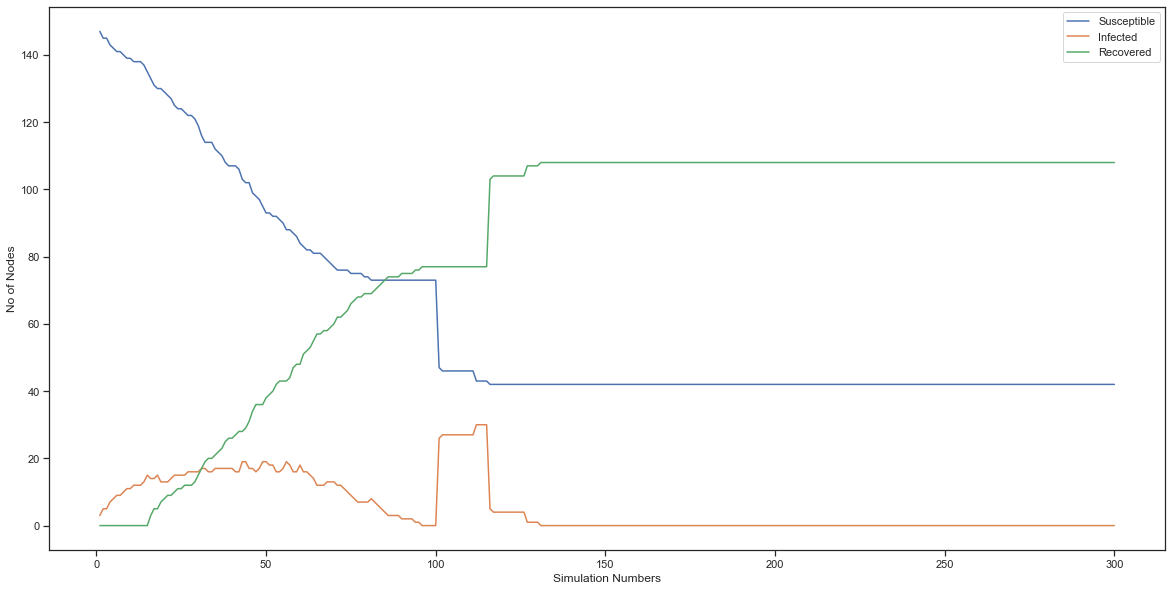

In [22]:
def second_wave(G, initial_infecteds, beta, t_simulation, recoveryTime, re_beta, re_infection):
    plt.figure(figsize=(25,10))
    infected = initial_infecteds.copy()
    recovered = []
    susceptible = [k for k in G.nodes if k not in infected]
    simulation = 1
    final_result = {}
    

    while simulation <= t_simulation:  
        #storing the result
        final_result[simulation] = {'S':susceptible.copy(), 'I':infected.copy(), 'R':recovered.copy()}
        
        # get susceptable neighbour nodes of infected nodes and infect the succescptable neighbour nodes 
        infected, susceptible = infectNodes(infected, susceptible, getSusceptibleNeighborNodes(G, infected, recovered), beta)
        
        # Recovery Logic
        if simulation >= recoveryTime:
            n = simulation - recoveryTime + 1
            for item in final_result[n]['I']:
                if item in infected:
                    infected.remove(item)
                if item not in recovered:
                    recovered.append(item)        
        
        if simulation == re_infection:
            allnodes = np.concatenate((susceptible,infected))
            
            if len(allnodes)>0:
                new_infection = np.random.choice(allnodes, 30)
                for item in new_infection:
                    if item in susceptible:
                        susceptible.remove(item)
                    if item not in infected:
                        infected.append(item)                        
            
        simulation += 1    
    return final_result

final_result_SIRS = second_wave(Gx, initial_infecteds = [3, 7, 9], beta=0.01, t_simulation=300, recoveryTime=15, re_beta = 0.02, re_infection=100)

plt.figure(figsize=(20,10))
plt.plot(final_result_SIRS.keys(), [len(final_result_SIRS[a]['S']) for a in final_result_SIRS.keys()], 
         label='Susceptible')
plt.plot(final_result_SIRS.keys(), [len(final_result_SIRS[a]['I']) for a in final_result_SIRS.keys()], 
         label='Infected')
plt.plot(final_result_SIRS.keys(), [len(final_result_SIRS[a]['R']) for a in final_result_SIRS.keys()], 
         label='Recovered')
plt.xlabel("Simulation Numbers")
plt.ylabel("No of Nodes")

plt.legend()

# (3.d) Remarks.

Plot all the simulations together and make your final remarks on the simulation result of SI, SIR and Second
Wave. How does the second wave affect your population? Please discuss this in your writing.

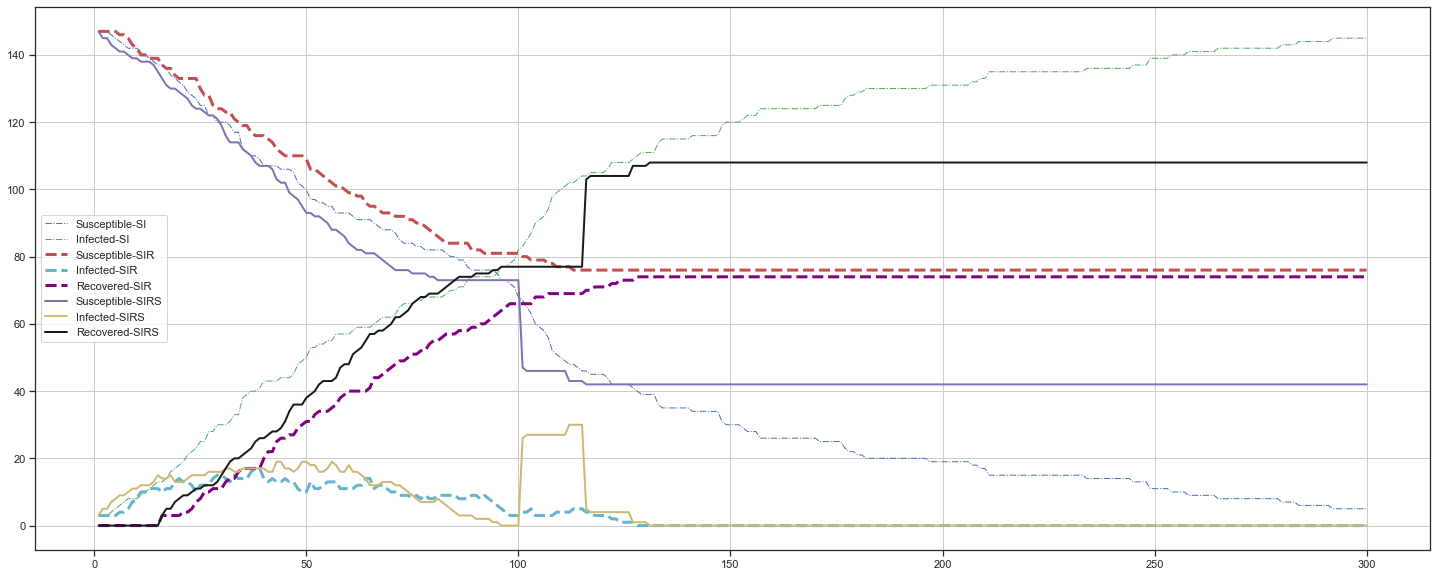

In [23]:
plt.figure(figsize=(25,10))
plt.plot(final_result_SI.keys(), [len(final_result_SI[a]['S']) for a in final_result_SI.keys()], 
         label='Susceptible-SI', ls='-.', color = 'b', lw = 1)
plt.plot(final_result_SI.keys(), [len(final_result_SI[a]['I']) for a in final_result_SI.keys()], 
         label='Infected-SI', ls='-.', color='g', lw = 1)

plt.plot(final_result_SIR.keys(), [len(final_result_SIR[a]['S']) for a in final_result_SIR.keys()], 
         label='Susceptible-SIR', ls='--', color = 'r', lw = 3)
plt.plot(final_result_SIR.keys(), [len(final_result_SIR[a]['I']) for a in final_result_SIR.keys()], 
         label='Infected-SIR', ls='--', color = 'c', lw = 3)
plt.plot(final_result_SIR.keys(), [len(final_result_SIR[a]['R']) for a in final_result_SIR.keys()], 
         label='Recovered-SIR', ls='--', color = 'purple', lw = 3)

plt.plot(final_result_SIRS.keys(), [len(final_result_SIRS[a]['S']) for a in final_result_SIRS.keys()], 
         label='Susceptible-SIRS', ls='-', color = 'm', lw = 2)
plt.plot(final_result_SIRS.keys(), [len(final_result_SIRS[a]['I']) for a in final_result_SIRS.keys()], 
         label='Infected-SIRS', ls='-', color = 'y', lw = 2)
plt.plot(final_result_SIRS.keys(), [len(final_result_SIRS[a]['R']) for a in final_result_SIRS.keys()], 
         label='Recovered-SIRS', ls='-', color = 'k', lw = 2)

plt.grid()
plt.legend()

# Remarks:



Please find my remarks on all 3 models as follows:

SI Model: This is the simplest of all disease models, in this case, individuals or nodes possibly have no immunity to the infection and are called susceptible. Once a node gets infected, it stays infected for its whole lifecycle and remains in contact with the connected susceptible nodes which then follow the same process and get infected and spread the infection. However, the spread of infection always may depend on certain factors and on fulfilling the same the susceptible nodes will get infected. Here, we have considered a probability 'beta' as the controlling factor for making a susceptible node infected. In our model diagram above, these 2 lines are presented in blue(Susceptible-SI) and green(Infected-SI), as we see at first only 3 nodes are infected and as the infection spreads the number of susceptible nodes reduces as they start to get the infection and eventually all the nodes get infected and hence the susceptible count gets to zero. This behaviour of this model matches with the diseases like cytomegalovirus(CMV).

SIR Model: In this model, all nodes get susceptible with time and the infection spreads in the same way as explained in the SI model above. However, in this model the infected nodes get recovered in 15 simulation or days, so once a node gets infected, it gets recovered automatically in 15 days and once recovered it does not get infected again. In the above diagram, the red line(Susceptible-SIR), cyan line(Infected-SIR) and purple line(Recovered-SIR) are presenting this model. In the plot, unlike the SI model, the infected population always stays on the check as the infected node gets recovered every 15 days and once recovered it doesn't get infected anymore. Hence, the infection eventually dies out and all infected nodes get recovered. Here for the sake of presentation, I have presented all the nodes as susceptible and then removed them from that list as they got infected and recovered. As the recovered nodes never got had a chance of infection or being susceptible again, the susceptible population kept reducing steadily until infection became zero.

Second Wave: In this model, we have considered the chance of a second wave after 100 days of the first infection which would infect the susceptible and infected nodes, however, the recovered population would remain immune to this second wave. In the above plot, these are presented by magenta(Susceptible-SIRS), yellow(Infected-SIRS) and black(Recovered-SIRS) lines. In the plot, we can see a sudden drop in the susceptible and a sudden rise in infection because of the second wave where 30 random nodes are getting infected again. In another 15 days, we see a noticeable jump in recovered population and a sudden drop in the infected population, as all the nodes which got infected as a result of the second wave on the 100th day, getting recovered on the 115th day. Again, as the recovered people, don't get infected, the infection slowly dies down as a result of all infectious nodes getting recovered.
